<a href="https://colab.research.google.com/github/EmmanuelECCI/tensorflow_studies/blob/main/Tensorflow_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.engine.training import optimizer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
classes= ["airplane" , "automobile" , "bird" ,"cat" ,"deer" , "dog" ,"frog", "horse" , "ship" , "truck" ]

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
def plot_sample(X, y, index):  
  plt.figure(figsize = (18,3))
  plt.imshow(X[index])
  plt.xlabel(f"Photo of a {classes[y[index]]}")


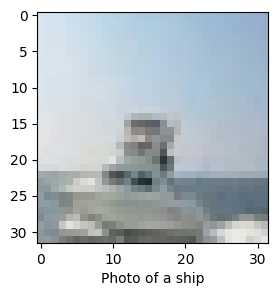

In [ ]:
plot_sample(X_train, y_train, 100)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:

ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
    ])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
            )

ann.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1563/1563 [==============================] - 78s 49ms/step - loss: 1.8108 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6244 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5420 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4819 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4332 - accuracy: 0.4970


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.4913 - accuracy: 0.4702


[1.4912855625152588, 0.4702000021934509]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred= ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.34      0.46      1000
           1       0.49      0.73      0.59      1000
           2       0.49      0.16      0.24      1000
           3       0.38      0.23      0.29      1000
           4       0.42      0.45      0.44      1000
           5       0.32      0.53      0.40      1000
           6       0.57      0.48      0.52      1000
           7       0.62      0.46      0.52      1000
           8       0.52      0.70      0.60      1000
           9       0.43      0.62      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [ ]:
y_pred_classes[:5]
#y_test[0]
#classes[y_test.item()]

[3, 9, 8, 8, 4]

[3 8 8 0 6]


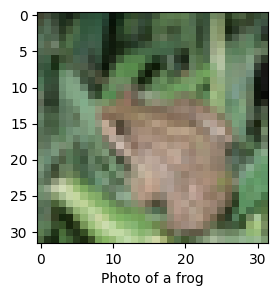

In [ ]:

y_test = y_test.reshape(-1,)
print(y_test[:5])
plot_sample(X_test, y_test, 4)

In [ ]:

cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32 ,kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 ,kernel_size= (3, 3), activation='relu' ),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
            )

cnn.fit(X_train, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
1563/1563 [==============================] - 44s 27ms/step - loss: 1.4545 - accuracy: 0.4753
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0916 - accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9439 - accuracy: 0.6707
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8548 - accuracy: 0.7022
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7821 - accuracy: 0.7263
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7163 - accuracy: 0.7494
Epoch 7/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6670 - accuracy: 0.7679
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6150 - accuracy: 0.7830
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.5660 - accuracy: 0.8019
Epoch 10/10
1563/1563 [==============================] - 43s 27m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9299 - accuracy: 0.7016


[0.9299336671829224, 0.7016000151634216]

In [ ]:
y_pred= cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.83      0.81      0.82      1000
           2       0.69      0.52      0.59      1000
           3       0.52      0.46      0.49      1000
           4       0.64      0.68      0.66      1000
           5       0.51      0.70      0.59      1000
           6       0.80      0.75      0.78      1000
           7       0.72      0.76      0.74      1000
           8       0.81      0.81      0.81      1000
           9       0.81      0.76      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [ ]:
y_pred_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
for i in range(10):
  print(classes[y_pred_classes[i]])

cat
ship
ship
airplane
deer
frog
dog
frog
cat
automobile


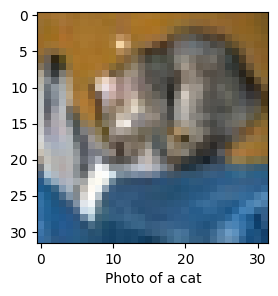

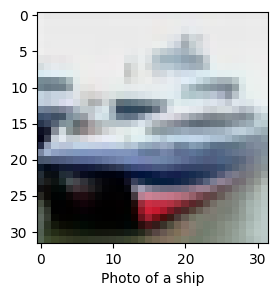

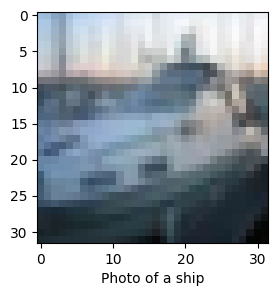

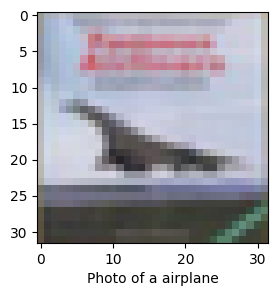

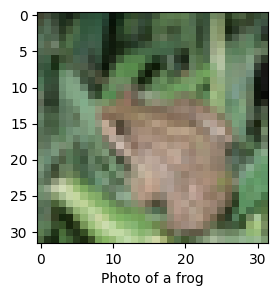

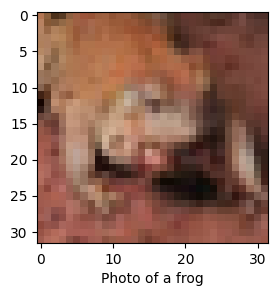

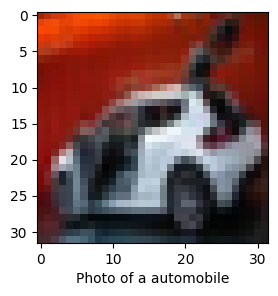

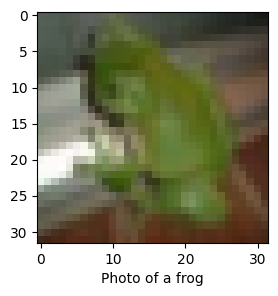

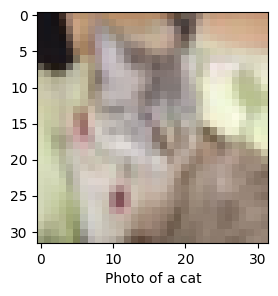

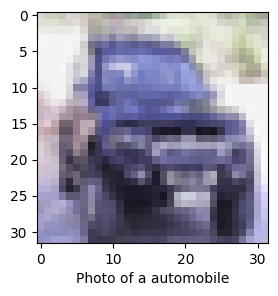

In [ ]:
for i in range(10):
  plot_sample(X_test, y_test,i)